## HYPOTHESIS BUILDING

#### 1. Has the network latency gone up since we switched internet service providers?

In [1]:
# Ho = Network latency is not longer than before with the new internet service provider.
# Hα = Network latency is longer than before with the new internet service provider.
# True Positive = Low p-value, narrow confidence interval, drop in average latency with new internet service provider than with the previous internet service provider.
# True Negative = There is no difference in the average latencies with or without the new internet service provider. OR, the average latency is less with the new one
# Type I Error = There are other factors causing *temporary* slower internet (weather)
# Type II Error = There are other services slowing down the internet service (large apps running in background)

#### 2. Is the website design any good?

In [2]:
# Ho = Customers are not making more purchases with the new website design.
# Hα = Customers are making more purchases with the new website design.
# True Positive = Low p-value, narrow confidence interval, same rate of new customers and churn, increased rate of purchases being made
# True Negative = same rate of new customers and churn, rate of purchases is unchanged or lowers
# Type I Error = reject null but true, redesign launched for new company, increase in sales was only increase in general popularity
# Type II Error = accept null but false, redesign launched during pandemic, steady or decrease in sales due to market crashing

#### 3. Is our television ad driving more sales?

In [3]:
# Ho = Customers are making more purchases because of our television ad 
# Hα = Customers are not making more purchases becasue of our television ad
# True Positive = Low p-value, narrow confidence interval, customers are completing survey during checkout that they heard about our products via tv ad 
# True Negative = customers are completeing survey during checkout that they heard about our products via any other method
# Type I Error = reject null but true, increase in feedback about the tv ad due to top (fastest) option in checkout survey
# Type II Error = accept null but false, people are watching regular tv less and less, might not reach target audience

## T-TEST

In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [5]:
# Ho = There is no difference between the offices for the average time it takes to sell homes
# Ha = There is a difference between the offices for the average time it takes to sell homes

# 2 sample, 2 tail

In [6]:
cust1 = 40
μ1 = 90
σ1 = 15
cust2 = 50
μ2 = 100
σ2 = 20
α = .05

sales1 = stats.norm(μ1, σ1)
sales2 = stats.norm(μ2, σ2)

In [7]:
bus1 = sales1.rvs(cust1)
bus2 = sales2.rvs(cust2)

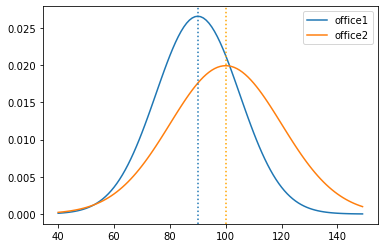

In [8]:
# another way to plot
x = np.arange(40,150)
y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)
plt.plot(x,y1, label='office1')
plt.plot(x,y2, label='office2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Count'>

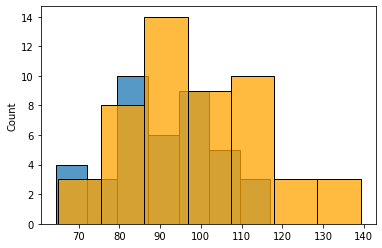

In [9]:
sns.histplot(bus1)
sns.histplot(bus2, color='orange')

In [10]:
bus1.mean(), bus2.mean()

(91.26934583501479, 98.54646088591079)

In [11]:
# check variance
s, p = stats.levene(bus1, bus2)

In [12]:
# variance not similar
p < α

False

In [13]:
t, p = stats.ttest_ind(bus1, bus2, equal_var=False)

In [14]:
p < α

True

In [15]:
# reject null hypothesis
# the average time it takes to sell the homes between the two offices is significantly different

In [16]:
## ANOTHER WAY
t, p = stats.ttest_ind_from_stats(μ1, σ1, cust1, μ2, σ2, cust2, equal_var=False)

In [17]:
p < α

True

#### 2. Load the mpg dataset and use it to answer the following questions:

In [19]:
mpg = pd.DataFrame(data('mpg'))
mpg['fuel_eff'] = 2/(1/mpg.cty + 1/mpg.hwy)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


##### 2.a Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [20]:
# Ho = There is not a difference in fuel efficiency between 2008 and 1999 cars
# Ha = There is a difference in fuel efficiency between 2008 and 1999 cars

# 2 samples, 2 tails

In [22]:
eight = mpg[mpg.year == 2008].fuel_eff
nine = mpg[mpg.year == 1999].fuel_eff

<AxesSubplot:xlabel='fuel_eff', ylabel='Count'>

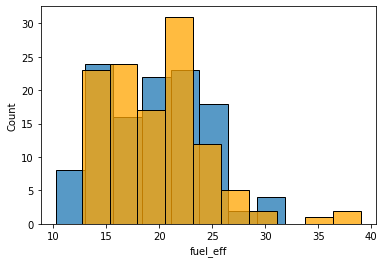

In [23]:
sns.histplot(eight)
sns.histplot(nine, color = 'orange')

In [36]:
[eight.mean(), eight.shape], [nine.mean(), nine.shape]

([19.488662986569054, (117,)], [19.68238764869729, (117,)])

In [27]:
α = 0.05

In [37]:
# check for variance
s, p = stats.levene(eight, nine)

In [38]:
# variance is similar
p < α

False

In [40]:
t, p = stats.ttest_ind(eight, nine)
p

0.7635345888327115

In [41]:
p < α

False

In [42]:
# there is not a difference in fuel efficiency between 2008 and 1999 vehicles
# accept null hypothesis

##### 2.b Are compact cars more fuel-efficient than the average car?

In [43]:
#Ho = Compact cars' fuel efficiency is <= the average car's fuel efficiency
#Ha = Compact cars' fuel efficiency is > the average car's fuel efficiency

# 1 sample, 1 tail

In [44]:
compact = mpg[mpg['class'] == 'compact'].fuel_eff
μth = mpg.fuel_eff.mean()

In [45]:
t, p = stats.ttest_1samp(compact, μth)

In [46]:
p/2 < α, t > 0

(True, True)

In [47]:
# reject null hypothesis

##### 2.c Do manual cars get better gas mileage than automatic cars?

In [48]:
# Ho = Manual cars' gas mileage is <= automatic cars' gas mileage
# Ha = Manual cars' gas mileage is > automatic cars' gas mileage

# 2 sample, 1 tail

In [49]:
manual = mpg[mpg['trans'].str.contains('manual')].fuel_eff
auto = mpg[mpg['trans'].str.contains('auto')].fuel_eff

In [50]:
#check variance
s, p = stats.levene(manual, auto)

In [51]:
# variance not similar
p < α

False

In [52]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)

In [53]:
p/2 < α, t > 0

(True, True)

In [54]:
# reject the null hypothesis

## CORRELATION

In [155]:
from math import sqrt
α = 0.05

### 1. Use the telco_churn data.

In [70]:
telco = pd.read_csv('telco_churn - telco_churn.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
telco2 = telco[telco.TotalCharges > 0]
telco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### 1.a Does tenure correlate with monthly charges?

In [ ]:
# Ho = There is not a linear relationship between tenure and monthly charges
# Ha = There is a linear relationship between tenure and monthly charges

In [80]:
x = telco2.tenure
y = telco2.MonthlyCharges

In [81]:
r, p = stats.pearsonr(x,y)
r,p

(0.24686176664089593, 3.989821323249241e-98)

In [156]:
p < α

True

In [157]:
# Reject Ho

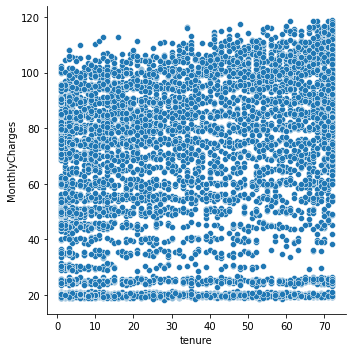

In [154]:
sns.relplot(data=telco2, x='tenure', y='MonthlyCharges')
plt.show()

#### 1.b Total charges? 

In [158]:
# Ho = There is not a linear relationship between tenure and total charges
# Ha = There is a linear relationship between tenure and total charges

In [165]:
x = telco2.tenure
y = telco2.TotalCharges

In [166]:
r, p = stats.pearsonr(x,y)
r,p

(0.8258804609332093, 0.0)

In [167]:
p < α

True

In [160]:
# Reject Ho

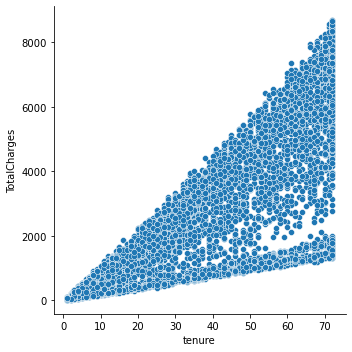

In [153]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges')
plt.show()

In [87]:
telco2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1.c What happens if you control for phone and internet service?

In [161]:
# Control for phone service
# Ho = There is not a linear relationship between tenure and total charges when controlling for phone service
# Ha = There is a linear relationship between tenure and total charges when controlling for phone service

In [162]:
phone = telco2[telco2.PhoneService == 'Yes']
no_phone = telco2[telco2.PhoneService == 'No']

In [163]:
r, p = stats.pearsonr(phone.tenure, phone.TotalCharges)
r, p

(0.8298393210699484, 0.0)

In [164]:
p < α

True

In [169]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.TotalCharges)
r, p

(0.953422850695451, 0.0)

In [170]:
p < α

True

In [171]:
# Reject Ho

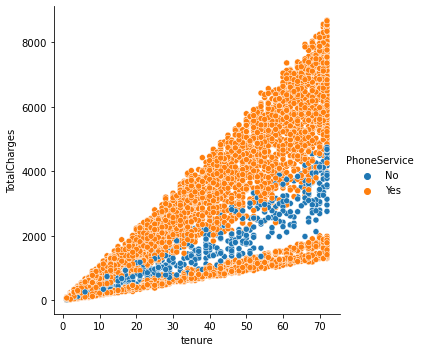

In [152]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges', hue='PhoneService')
plt.show()

In [172]:
# Control for Internet Service
# Ho = There is not a linear relationship between tenure and total charges when controlling for internet service
# Ha = There is a linear relationship between tenure and total charges when controlling for internet service

In [173]:
telco2.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [174]:
internet = telco2[telco2.InternetService != 'No']
no_internet = telco2[telco2.InternetService == 'No']

In [97]:
r,p = stats.pearsonr(internet.tenure, internet.TotalCharges)
r,p

(0.931934618741812, 0.0)

In [176]:
p < α

True

In [177]:
r,p = stats.pearsonr(no_internet.tenure, no_internet.TotalCharges)
r,p

(0.9814648859044293, 0.0)

In [178]:
p < α

True

In [179]:
# Reject Ho

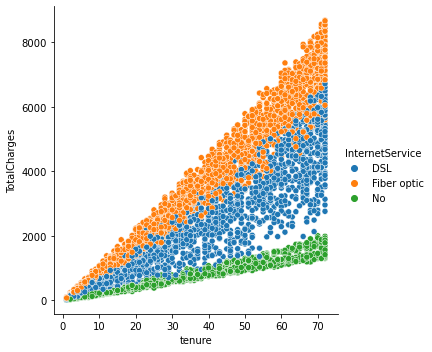

In [204]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges', hue='InternetService')
plt.show()

In [224]:
#none = telco2[(telco2.InternetService == 'No') & (telco2.PhoneService == 'No')].TotalCharges
internet = telco2[(telco2.InternetService != 'No') & (telco2.PhoneService == 'No')].tenure
phone = telco2[(telco2.InternetService == 'No') & (telco2.PhoneService == 'Yes')].tenure
both = telco2[(telco2.InternetService != 'No') & (telco2.PhoneService == 'Yes')].tenure

In [226]:
s,p = stats.f_oneway(internet, phone, both)
s, p

(5.702299314741652, 0.00335374279875315)

### 2. Use the employees database.

In [111]:
import env
user = env.user
password = env.password
host = env.host
schema = 'employees'

In [112]:
query = '''
        SELECT * FROM 
        dept_emp
        JOIN salaries USING (emp_no);
'''

In [120]:
# query wont run... saved csv from mySQL
# conn = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
# emps = pd.read_sql(query, conn)

sals = pd.read_csv('salaries.csv')
sals = sals.rename(columns={'from_date': 'emp_from_date', 'to_date': 'emp_to_date', 'from_date.1': 'sal_from_date', 'to_date.1': 'sal_to_date'})
sals = sals[(sals.emp_to_date == '9999-01-01') & (sals.sal_to_date == '9999-01-01')]
sals.head()

,emp_no,dept_no,emp_from_date,emp_to_date,salary,sal_from_date,sal_to_date
0,10001,d005,1986-06-26,9999-01-01,88958,2002-06-22,9999-01-01
1,10002,d007,1996-08-03,9999-01-01,72527,2001-08-02,9999-01-01
2,10003,d004,1995-12-03,9999-01-01,43311,2001-12-01,9999-01-01
3,10004,d004,1986-12-01,9999-01-01,74057,2001-11-27,9999-01-01
4,10005,d003,1989-09-12,9999-01-01,94692,2001-09-09,9999-01-01


#### 2.a Is there a relationship between how long an employee has been with the company and their salary?

In [180]:
# Ho = There is not a linear relationship between hire date and salary
# Ha = There is a linear relationship between hire date and salary

In [181]:
sals['year_hired'] = sals.emp_from_date.str.slice(0,4).astype('int')
sals.head()

,emp_no,dept_no,emp_from_date,emp_to_date,salary,sal_from_date,sal_to_date,year_hired
0,10001,d005,1986-06-26,9999-01-01,88958,2002-06-22,9999-01-01,1986
1,10002,d007,1996-08-03,9999-01-01,72527,2001-08-02,9999-01-01,1996
2,10003,d004,1995-12-03,9999-01-01,43311,2001-12-01,9999-01-01,1995
3,10004,d004,1986-12-01,9999-01-01,74057,2001-11-27,9999-01-01,1986
4,10005,d003,1989-09-12,9999-01-01,94692,2001-09-09,9999-01-01,1989


In [182]:
x = sals.year_hired
y = sals.salary
r,p = stats.pearsonr(x,y)
r,p

(-0.45164196762188, 0.0)

In [183]:
p < α

True

In [184]:
# Reject Ho

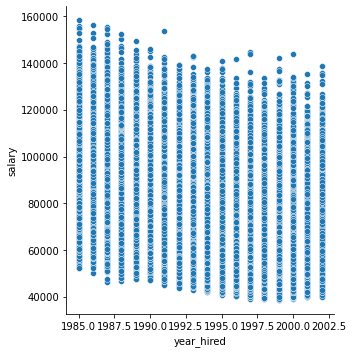

In [185]:
sns.relplot(data=sals, x='year_hired', y='salary')
plt.show()

In [186]:
# There is moderate negative correlation between salary and the year hired(inverse of how long theyve been with the company)

#### 2.b Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [195]:
# Ho = There is not a linear relationship between hire date and number of titles
# Ha = There is a linear relationship between hire date and number of titles

In [187]:
titles = pd.read_csv('titles.csv')
titles.hire_date = titles.hire_date.str.slice(0,4).astype('int')
titles = titles.rename(columns={'count(title)': 'title_count'})
titles.head()

,emp_no,title_count,hire_date
0,10001,1,1986
1,10002,1,1985
2,10003,1,1986
3,10004,2,1986
4,10005,2,1989


In [188]:
x = titles.hire_date
y = titles.title_count
r,p = stats.pearsonr(x,y)
r,p

(-0.28635198982906035, 0.0)

In [189]:
p < α

True

In [190]:
# Reject Ho

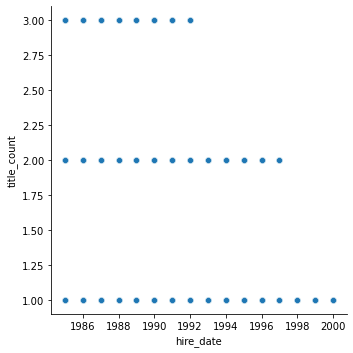

In [191]:
sns.relplot(data=titles, x='hire_date', y='title_count')
plt.show()

In [192]:
# There is moderate negative correlation between count of titles and the year hired(inverse of how long theyve been with the company)

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [196]:
# Ho = There is not a linear relationship between days and reaction time
# Ha = There is a linear relationship between days and reaction time

In [197]:
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [198]:
x = ss.Days
y = ss.Reaction
r,p = stats.pearsonr(x,y)
r,p

(0.5352302262650255, 9.89409632221439e-15)

In [199]:
p < α

True

In [200]:
# Reject Ho

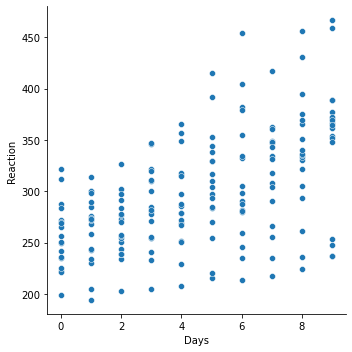

In [201]:
sns.relplot(data=ss, x='Days', y='Reaction')
plt.show()

## CHI SQUARE